In [1810]:

import pandas as pd
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt
import csv
from scipy.stats import norm, binom 
from scipy import linalg
import random
from decimal import Decimal
import pydtmc
from collections import Counter
import quantecon as qe
from mpl_toolkits.mplot3d import Axes3D

In [1811]:
## Base parameters
LC = 1 ## Lobby Cost
T = 10 ## Tax
mF = 10 ## Mean Fee of Getting Caught
nPPL = 11
R = nPPL * .25 # enforcement resources

LobH = [2] ## Lobby History, arbitrary preset
CatH = [1] ## Catch history, arbitrary preset

In [1812]:
def pSS1(t = len(LobH) - 1): #Gets probability of lobbying successfully, subjective
    return 1 - ((.8+CatH[t]) / (1+LobH[t]))

In [1813]:
def pSS(nL, nC): #Gets probability of lobbying successfully, subjective
    return 1 - ((.8+nC) / (1+nL))

In [1814]:
def pCat(t = len(LobH) - 1):  #Gets objective probability of success 
    if LobH[t] <= R:
        return .8
    else:
        return .8 * (R / LobH[t])

In [1815]:
def pCat2(nL):  #Gets objective probability of success 
    if nL <= R:
        return .8
    else:
        return .8 * (R / nL)

In [1816]:
def pL(): ## Calculates subjective probability of lobbying
    ps = pSS()
    temp = (-LC + (ps*T))/((1-ps)*mF) ## value that the normal distrobution draw need to be less then to choose to lobby
    return norm(loc = 1, scale = 1).cdf(temp) ## probability of lobbying for individual

In [1817]:
def pL(nL, nC): ## Calculates subjective probability of lobbying
    ps = pSS(nL, nC)
    temp = (-LC + (ps*T))/((1-ps)*mF) ## value that the normal distrobution draw need to be less then to choose to lobby
    return norm(loc = 1, scale = 1).cdf(temp) ## probability of lobbying for individual

In [1818]:
def getTM(numPPL = 10, tR = 3):
    R = tR
    nPPL = numPPL
    lis = []
    for i in range(0,nPPL+1):
        for r in range(0,nPPL+1):
            lis.append(i)
            
    TM = pd.DataFrame({'L': lis }) #Transition Matrix

    c = []
    for i in range(0,nPPL+1):
        for r in range(0,nPPL+1):
            c.append(r)

    TM["C"] = c
    TM = TM.drop(TM[TM.C > TM.L].index) ## drop rows where C > L

    for i in range(nPPL+1): ## Clear Matrix
        for r in range(0,i+1):
            TM[f"{i},{r}"] = 0

    TM = TM.reset_index(drop = True)
    TM.head(10)
    for l2 in range(2,len(TM)+2):
        tempList = []
        for l1 in range(0,len(TM)):
            pl2 = pL(TM.L[l1], TM.C[l1])  #grabs the probability of lobbying based on t-5 lobbying
            tL, tC = TM.columns[l2].split(",")
            tL = int(tL)
            tC = int(tC)
            pnLob = binom.pmf(tL, nPPL, pl2) ## binomial distrobution, gets probability they lobied that many times
            pcat = pCat2(tL)
            tempList.append(binom.pmf(tC, tL, pcat) * pnLob) ###Appends each value to list   ### This need to be fixed for double digits
        TM[TM.columns[l2]] = tempList
    
    return TM


In [1831]:
def getTMR(tR = nPPL * .3):
    nPPL = 10
    R = tR
    TM = getTM(numPPL = nPPL, tR = R)
    return TM

In [1837]:
getTM(tR = 3) - getTM(tR = 5)

,L,C,"0,0","1,0","1,1","2,0","2,1","2,2","3,0","3,1",...,"10,1","10,2","10,3","10,4","10,5","10,6","10,7","10,8","10,9","10,10"
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1821]:
def CollapsedTM(numPPL = 10):
    nPPL = numPPL
    TM = getTM(nPPL)
    cTM = TM.groupby("L").sum()
    lTM = pd.DataFrame({'L': range(0,nPPL+1)})
    for i in range(0, nPPL + 1):
        lTM[i] = cTM[[col for col in cTM.columns if col.split(",")[0] == str(i)]].sum(axis=1)
    lTM = lTM.div(lTM.L+1, axis=0)
    lTM.L = range(0,nPPL+1)
    return lTM

In [1822]:
def ArrColTM():
    colTM = CollapsedTM()
    colTM = colTM.iloc[0:len(colTM), 1:len(colTM)+1]
    colTM = colTM.to_numpy()
    return colTM

In [1823]:
ArrColTM()

array([[1.20400631e-01, 2.83866772e-01, 3.01170804e-01, 1.89350910e-01,
        7.81252176e-02, 2.21033592e-02, 4.34273002e-03, 5.85073701e-04,
        5.17282326e-05, 2.71019739e-06, 6.38979194e-08],
       [8.89148789e-02, 1.68375590e-01, 1.47618538e-01, 9.30832462e-02,
        7.99369123e-02, 1.06207171e-01, 1.26246055e-01, 1.07004551e-01,
        5.98224700e-02, 1.98318307e-02, 2.95875642e-03],
       [7.38238833e-02, 1.52894673e-01, 1.66646121e-01, 1.32154297e-01,
        8.27604852e-02, 4.02015423e-02, 1.63300572e-02, 1.65947740e-02,
        5.34968470e-02, 1.27326048e-01, 1.37771272e-01],
       [6.82781022e-02, 1.42269617e-01, 1.51412883e-01, 1.20556849e-01,
        9.34074888e-02, 7.57105116e-02, 5.47291337e-02, 2.98977138e-02,
        1.14670214e-02, 1.71238641e-02, 2.35146815e-01],
       [6.46451835e-02, 1.37283191e-01, 1.50227704e-01, 1.19045183e-01,
        8.18692452e-02, 5.98979228e-02, 5.64805999e-02, 5.75516588e-02,
        4.56029127e-02, 2.26829717e-02, 2.04713427e-

<Figure size 1000x1000 with 0 Axes>

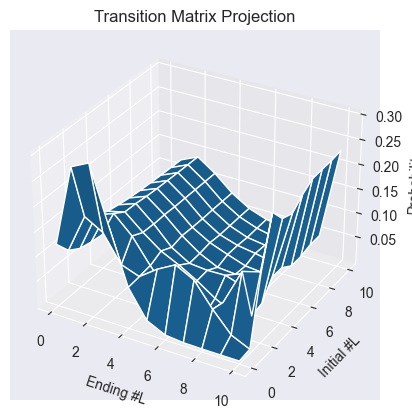

In [1824]:
sns.set_style ("darkgrid")
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

x = range(nPPL)
y = range(nPPL)

data = ArrColTM()

hf = plt.figure()
ha = hf.add_subplot(projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, data)

ha.set_xlabel('Ending #L')
ha.set_ylabel('Initial #L')
ha.set_zlabel('Probability')
ha.set_title("Transition Matrix Projection")

plt.show()

for l1 in range(0,len(TM)):
    pl2 = pL(TM.L[l1], TM.C[l1])  #grabs the probability of lobbying based on t-5 lobbying
    for l2 in range(2,len(TM)+2):
        pnLob = binom.pmf(int(TM.columns[l2][0]), nPPL, pl2) ## binomial distrobution, gets probability they lobied that many times
        pcat = pCat2(int(TM.columns[l2][0]))
        TM.loc[l1][l2] = 1#int(binom.pmf(int(TM.columns[l2][2]), int(TM.columns[l2][0]), pcat) * pnLob * 10000000000000000000)### This need to be fixed for double digits

TM

for l2 in range(2,len(TM)+2):
    tempList = []
    for l1 in range(0,len(TM)):
        pl2 = pL(TM.L[l1], TM.C[l1])  #grabs the probability of lobbying based on t-5 lobbying
        pnLob = binom.pmf(int(TM.columns[l2][0]), nPPL, pl2) ## binomial distrobution, gets probability they lobied that many times
        pcat = pCat2(int(TM.columns[l2][0]))
    TM.loc[l1][l2] = binom.pmf(int(TM.columns[l2][2]), int(TM.columns[l2][0]), pcat) * pnLob### This need to be fixed for double digits

TM

for l1 in range(0,len(TM)):
    pl2 = pL(TM.L[l1], TM.C[l1])  #grabs the probability of lobbying based on t-5 lobbying
    for l2 in range(2,len(TM)+2):
        pnLob = binom.pmf(int(TM.columns[l2][0]), nPPL, pl2) ## binomial distrobution, gets probability they lobied that many times
        pcat = pCat2(int(TM.columns[l2][0]))
    TM.loc[l1][l2] = 1.5#int(binom.pmf(int(TM.columns[l2][2]), int(TM.columns[l2][0]), pcat) * pnLob * 10000000000000000000)### This need to be fixed for double digits

TM

In [1825]:
#TM['s'] = TM.sum(axis = 1)

In [1826]:
#TML = pd.DataFrame({'L': range(0,nPPL+1)}) #Transition Matrix
#for i in range(nPPL+1): ## Clear Matrix
#    TML[i] = 0

#for l1 in range(0,nPPL+1): # row
#    for l2 in range(0,nPPL+1): ## column
#        TML[l2][l1] = TM.loc[TM['L'] == l1, l2].sum() / (l1+1)
#TML




In [1827]:
"""
s = TM.sum(axis = 1) - TM["L"] - TM["C"]
s[0]
#Rows sum to 1
"""

'\ns = TM.sum(axis = 1) - TM["L"] - TM["C"]\ns[0]\n#Rows sum to 1\n'

In [1833]:
def StationaryDist(tTM = getTM()):
    TM = tTM
    nPPL = 10
    tempTM = TM.iloc[0:len(TM),2:len(TM)+2]
    #tempTM = tempTM.div(tempTM.sum(axis=1), axis=0)
    tempTM
    mat = tempTM.to_numpy()
    mc = qe.MarkovChain(mat)     #### test if markov chain
    statdist = mc.stationary_distributions
    if mc.is_irreducible:  ## transition matrix is irreducible
        return statdist[0]
    else: return "bruh, ur bad"

In [1829]:
def StationaryDistR(R):
    return StationaryDist(tTM = getTMR(R))

In [1834]:
getTMR(3) - getTMR(8)

,L,C,"0,0","1,0","1,1","2,0","2,1","2,2","3,0","3,1",...,"10,1","10,2","10,3","10,4","10,5","10,6","10,7","10,8","10,9","10,10"
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
StationaryDistR(3)

array([7.23520038e-02, 3.03496969e-02, 1.21398788e-01, 6.36780519e-03,
       5.09424415e-02, 1.01884883e-01, 2.28044289e-03, 1.88136539e-02,
       5.17375482e-02, 4.74260858e-02, 3.42262555e-03, 1.67328360e-02,
       3.06768660e-02, 2.49959649e-02, 7.63765595e-03, 3.50425755e-03,
       1.37667261e-02, 2.16334267e-02, 1.69976924e-02, 6.67766488e-03,
       1.04934734e-03, 3.53662028e-03, 1.22851020e-02, 1.77810687e-02,
       1.37257373e-02, 5.95985960e-03, 1.38017801e-03, 1.33175071e-04,
       3.53559464e-03, 1.13433661e-02, 1.55971285e-02, 1.19144731e-02,
       5.46080018e-03, 1.50172005e-03, 2.29429452e-04, 1.50221665e-05,
       3.59472386e-03, 1.09081276e-02, 1.44814797e-02, 1.09859501e-02,
       5.20885567e-03, 1.58061827e-03, 2.99772431e-04, 3.24876526e-05,
       1.54036284e-06, 4.23760047e-03, 1.23388955e-02, 1.59679824e-02,
       1.20542612e-02, 5.84986206e-03, 1.89260243e-03, 4.08208367e-04,
       5.66003198e-05, 4.57796704e-06, 1.64567443e-07, 1.20908762e-02,
      

In [ ]:
"""
st = mat
for i in range(0,10000):
    st = np.matmul(mat,st) #mat!
    #st = st/st.sum(axis=1)
    
st[0]
"""

'\nst = mat\nfor i in range(0,10000):\n    st = np.matmul(mat,st) #mat!\n    #st = st/st.sum(axis=1)\n    \nst[0]\n'

In [ ]:
"""
st2 = mat
for i in range(0,100):
    st2 = np.matmul(st2,st2)
    st2 = st2/st2.sum(axis=1)
    
st2[0] - st[0]
"""

'\nst2 = mat\nfor i in range(0,100):\n    st2 = np.matmul(st2,st2)\n    st2 = st2/st2.sum(axis=1)\n    \nst2[0] - st[0]\n'

In [ ]:
sd = pd.DataFrame({'L': TM.L, 'C': TM.C, "prob": StationaryDist()})
print(sd)

     L   C          prob
0    0   0  7.235200e-02
1    1   0  3.034970e-02
2    1   1  1.213988e-01
3    2   0  6.367805e-03
4    2   1  5.094244e-02
..  ..  ..           ...
61  10   6  1.278338e-03
62  10   7  2.060324e-04
63  10   8  2.179189e-05
64  10   9  1.365873e-06
65  10  10  3.852464e-08

[66 rows x 3 columns]


In [ ]:
def CollapsedSD(statDist = StationaryDist()):
    nPPL = 10
    sd = pd.DataFrame({'L': TM.L, 'C': TM.C, "prob": statDist})
    csd = sd.groupby("L").sum()
    csd = csd.drop(['C'], axis = 1) #prob still sums to 1
    return csd

In [ ]:
def CollapsedSDR(R):
    return CollapsedSD(statDist = StationaryDistR(R))

In [ ]:
StationaryDistR(3) - StationaryDistR(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
csd = CollapsedSDR(3)

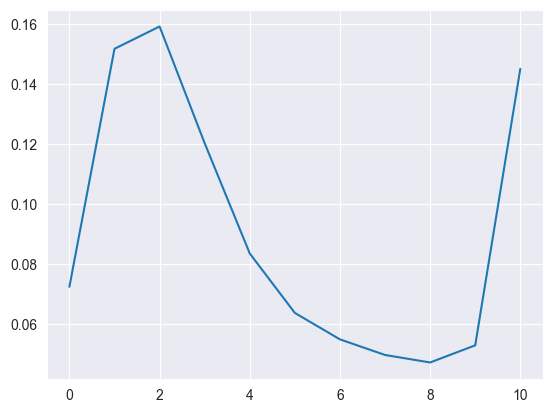

In [ ]:
plt.plot(csd)

In [ ]:
"""
templTM = lTM.iloc[0:len(lTM),1:len(lTM)+1]
#tempTM = tempTM.div(tempTM.sum(axis=1), axis=0)
#s = tempTM.sum(axis = 1)
#s[0]
lmat = templTM.to_numpy()
#print(np.matrix(lmat))

lst = lmat
for i in range(0,100000):
    lst = np.matmul(lmat,lst) #mat!
    #st = st/st.sum(axis=1)
    
lst[0]
"""

'\ntemplTM = lTM.iloc[0:len(lTM),1:len(lTM)+1]\n#tempTM = tempTM.div(tempTM.sum(axis=1), axis=0)\n#s = tempTM.sum(axis = 1)\n#s[0]\nlmat = templTM.to_numpy()\n#print(np.matrix(lmat))\n\nlst = lmat\nfor i in range(0,100000):\n    lst = np.matmul(lmat,lst) #mat!\n    #st = st/st.sum(axis=1)\n    \nlst[0]\n'

In [ ]:
#linalg.eig(mat, left = True)

In [ ]:
#linalg.eig(mat2, left = True)[0]

Dynamic Part

In [ ]:
def it():
    t = len(LobH)
    LobH.append(0)
    CatH.append(0)
    ps = pSS1()
    for i in range(0,nPPL):
        if -T < (ps * -LC) + ((1-ps) * (-T - LC - (mF * np.random.normal(loc = 1, scale = 1)))):
            LobH[t] = LobH[t] + 1
            
    for i in range(0,LobH[t]):
        if random.random() < pCat():
            CatH[t] = CatH[t] + 1

In [ ]:
def run(itr = 10000):
    for i in range(0,itr):
        it()


In [ ]:
def set(LC = 1, T = 10, mF = 10, nPPL = 11, R = nPPL * .25, itr = 10000):
    LC ## Lobby Cost
    T ## Tax
    mF ## Mean Fee of Getting Caught
    nPPL
    R # enforcement resources

    LobH = [2] ## Lobby History, arbitrary preset
    CatH = [1] ## Catch history, arbitrary preset
    run(itr)

In [ ]:
set(LC = 5, T = 10, mF = 10, nPPL = 100, R = nPPL * .25, itr = 10000)

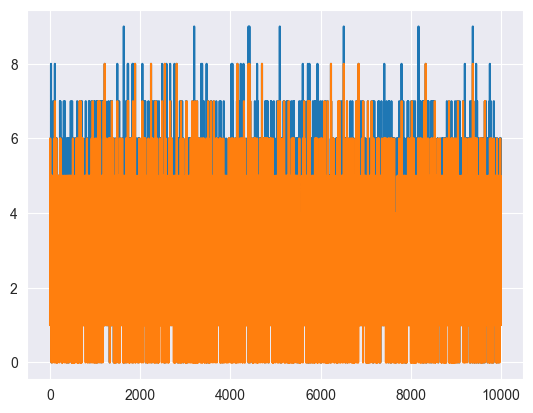

In [ ]:
plt.plot(LobH)
plt.plot(CatH)

(array([1047., 1862., 2468., 2315., 1435.,  827.,   39.,    8.,    0.,
           0.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

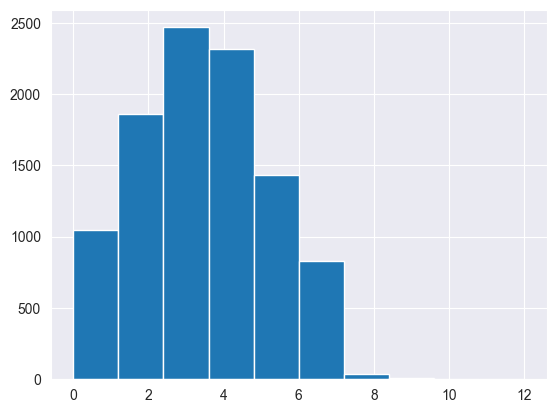

In [ ]:
plt.hist(LobH, range = [0,nPPL+1])



[(0.0, 12.0)]

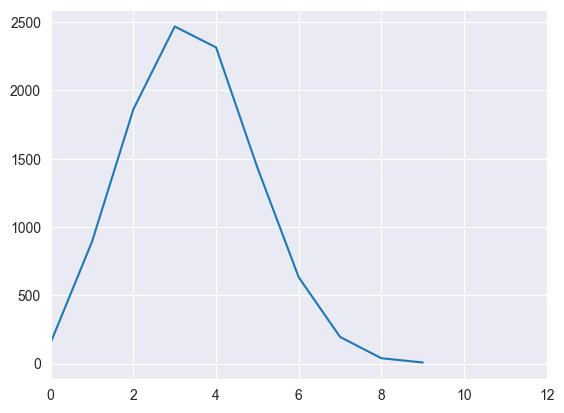

In [ ]:
uni = range(0, nPPL+1)
nL = Counter(LobH).keys() # equals to list(set(words))
Lfreq = Counter(LobH).values() # counts the elements' frequency

GraphProbF = sns.lineplot(x = nL, y = Lfreq) ## Graph probFTR
GraphProbF.set(xlim=(0,nPPL+1))

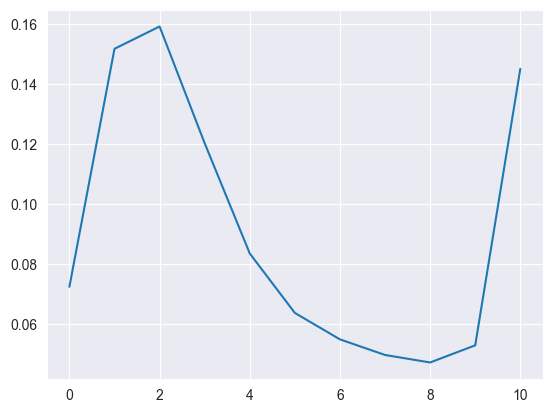

In [ ]:
plt.plot(CollapsedSD())

(array([ 438., 1578., 2550., 2584.,    0., 1720.,  814.,  248.,   55.,
          14.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

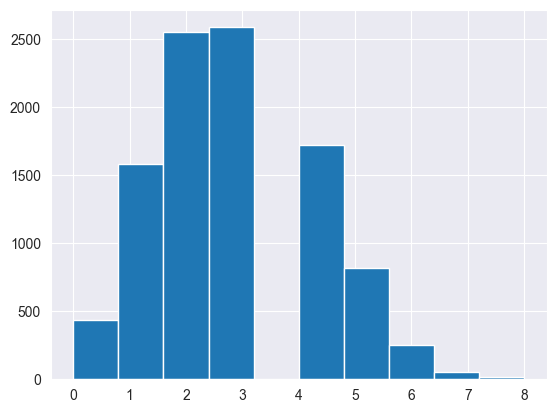

In [ ]:
plt.hist(CatH)

In [ ]:
def ArrItrR():
    nPPL = 10
    R = 0
    RDis = [CollapsedSDR(R).prob.to_numpy()]
    for tR in range(1,10+1):
        R = tR * .1 ## .1 intervuls for Resources
        RDis = np.vstack([RDis, CollapsedSDR(R).prob.to_numpy()])
    return RDis

In [ ]:
CollapsedSDR(3).prob.to_numpy() - CollapsedSDR(5).prob.to_numpy()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
ArrItrR()

array([[0.072352  , 0.15174848, 0.15919513, 0.12025773, 0.08346595,
        0.06362912, 0.05480174, 0.04959753, 0.04709356, 0.05281076,
        0.145048  ],
       [0.072352  , 0.15174848, 0.15919513, 0.12025773, 0.08346595,
        0.06362912, 0.05480174, 0.04959753, 0.04709356, 0.05281076,
        0.145048  ],
       [0.072352  , 0.15174848, 0.15919513, 0.12025773, 0.08346595,
        0.06362912, 0.05480174, 0.04959753, 0.04709356, 0.05281076,
        0.145048  ],
       [0.072352  , 0.15174848, 0.15919513, 0.12025773, 0.08346595,
        0.06362912, 0.05480174, 0.04959753, 0.04709356, 0.05281076,
        0.145048  ],
       [0.072352  , 0.15174848, 0.15919513, 0.12025773, 0.08346595,
        0.06362912, 0.05480174, 0.04959753, 0.04709356, 0.05281076,
        0.145048  ],
       [0.072352  , 0.15174848, 0.15919513, 0.12025773, 0.08346595,
        0.06362912, 0.05480174, 0.04959753, 0.04709356, 0.05281076,
        0.145048  ],
       [0.072352  , 0.15174848, 0.15919513, 0.12025773, 0.

<Figure size 1000x1000 with 0 Axes>

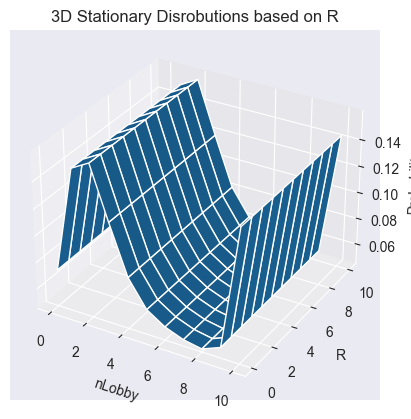

In [ ]:
sns.set_style ("darkgrid")
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

x = range(nPPL)
y = range(nPPL)

data = ArrItrR()

hf = plt.figure()
ha = hf.add_subplot(projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, data)

ha.set_xlabel('nLobby')
ha.set_ylabel('R')
ha.set_zlabel('Probability')
ha.set_title("3D Stationary Disrobutions based on R")

plt.show()